In [4]:
"""
Insurance Dataset Analysis
-------------------------
This script performs comprehensive exploratory data analysis on an insurance dataset,
including data cleaning, visualization, and outlier detection.
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

# Set the style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

# File path - use raw string to avoid escape character issues
file_path = r'C:\Users\haric\Downloads\insurance.csv'






# 1. DATA LOADING AND INITIAL EXPLORATION

In [5]:

# Load the dataset
print("Loading dataset...")
df = pd.read_csv(r'C:\Users\haric\Downloads\insurance.csv')

Loading dataset...


In [9]:
# Display the first few rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Get basic dataset information
print("\nDataset Overview:")
df.info()

# Generate a detailed statistical summary
print("\nStatistical Summary:")
print(df.describe(include='all').T.to_string())  # Transposed and formatted as a string for full output visibility

# Display dataset dimensions
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")



First 5 Rows of the Dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Statistical Summary:
           count unique  

# 2. DATA CLEANING AND QUALITY CHECKS

In [98]:
# Check for missing values
print("\n----- Missing Values Check -----")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
print(missing_data[missing_data['Missing Values'] > 0])  # Show only columns with missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")

# Check for duplicate rows
print("\n----- Duplicate Rows Check -----")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print("Displaying duplicate rows:")
    print(df[df.duplicated(keep='first')])



----- Missing Values Check -----
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []
No missing values found in the dataset.

----- Duplicate Rows Check -----
Number of duplicate rows: 1
Displaying duplicate rows:
     age   sex     bmi  children smoker     region   charges
581   19  male 30.5900         0     no  northwest 1639.5631


# 3. DATA EXPLORATION - CATEGORICAL VARIABLES


----- Categorical Variables Analysis -----

Unique values in 'sex':
male      676
female    662
Name: sex, dtype: int64


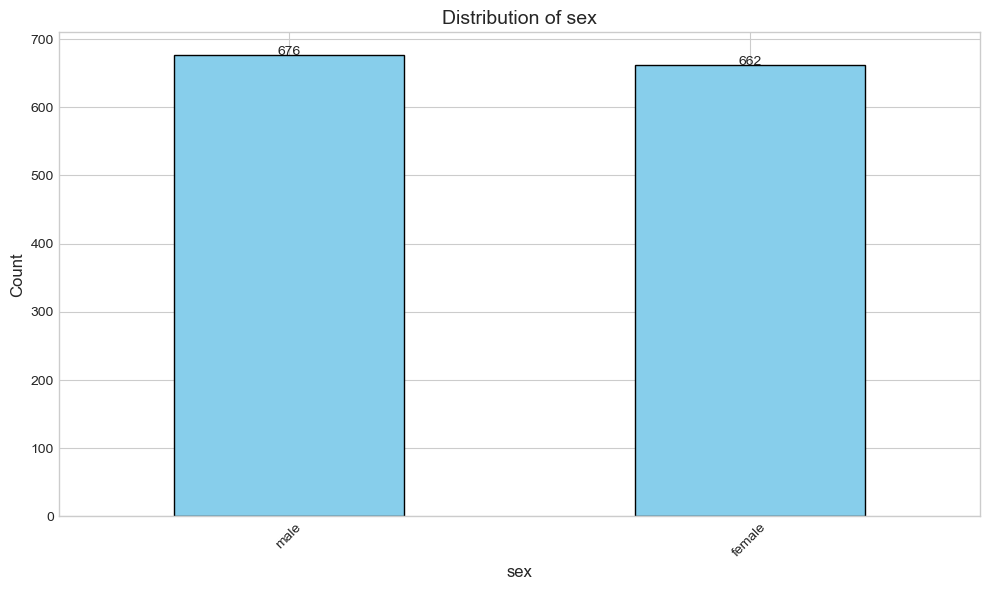


Unique values in 'children':
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


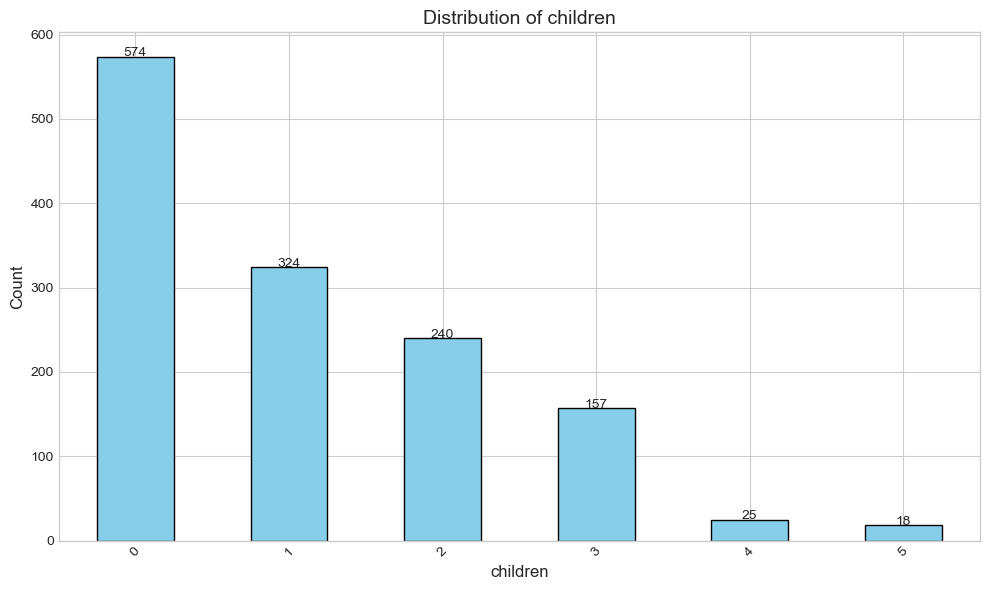


Unique values in 'smoker':
no     1064
yes     274
Name: smoker, dtype: int64


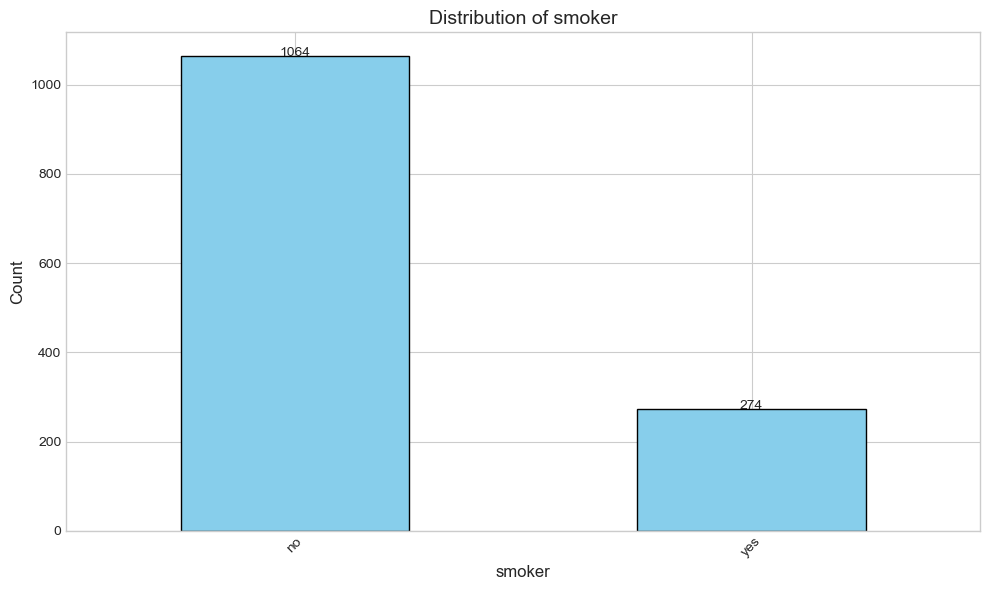


Unique values in 'region':
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


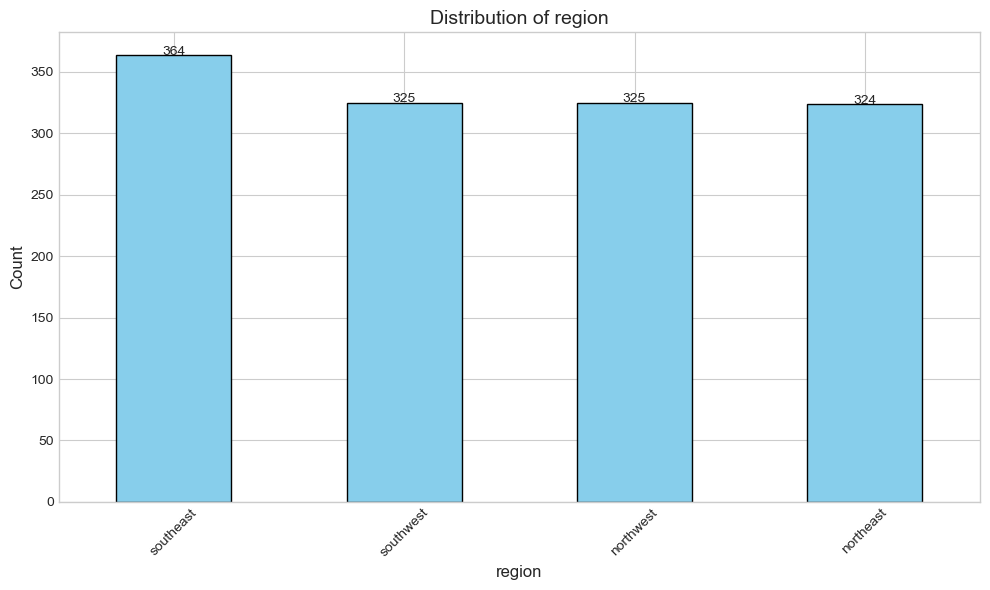


Categorical columns identified: ['sex', 'children', 'smoker', 'region']


In [99]:
print("\n----- Categorical Variables Analysis -----")
categorical_columns = []

for column in df.columns:
    # Check if column is categorical (object type or has few unique values)
    if df[column].dtype == 'object' or (df[column].nunique() < 10 and df[column].dtype != 'float64'):
        categorical_columns.append(column)
        
        # Display unique values and their counts
        print(f"\nUnique values in '{column}':")
        value_counts = df[column].value_counts(dropna=False)
        print(value_counts)
        
        # Plot bar chart for categorical columns
        plt.figure(figsize=(10, 6))
        ax = value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        
        # Add value labels on top of each bar
        for i, v in enumerate(value_counts):
            ax.text(i, v + 0.1, str(v), ha='center', fontsize=10)
            
        plt.tight_layout()
        plt.savefig(f'{column}_distribution.png')  # Save the figure
        plt.show()

print(f"\nCategorical columns identified: {categorical_columns}")




# 4. DATA EXPLORATION - CONTINUOUS VARIABLES


----- Continuous Variables Analysis -----

Statistics for 'age':
count   1338.0000
mean      39.2070
std       14.0500
min       18.0000
25%       27.0000
50%       39.0000
75%       51.0000
max       64.0000
Name: age, dtype: float64


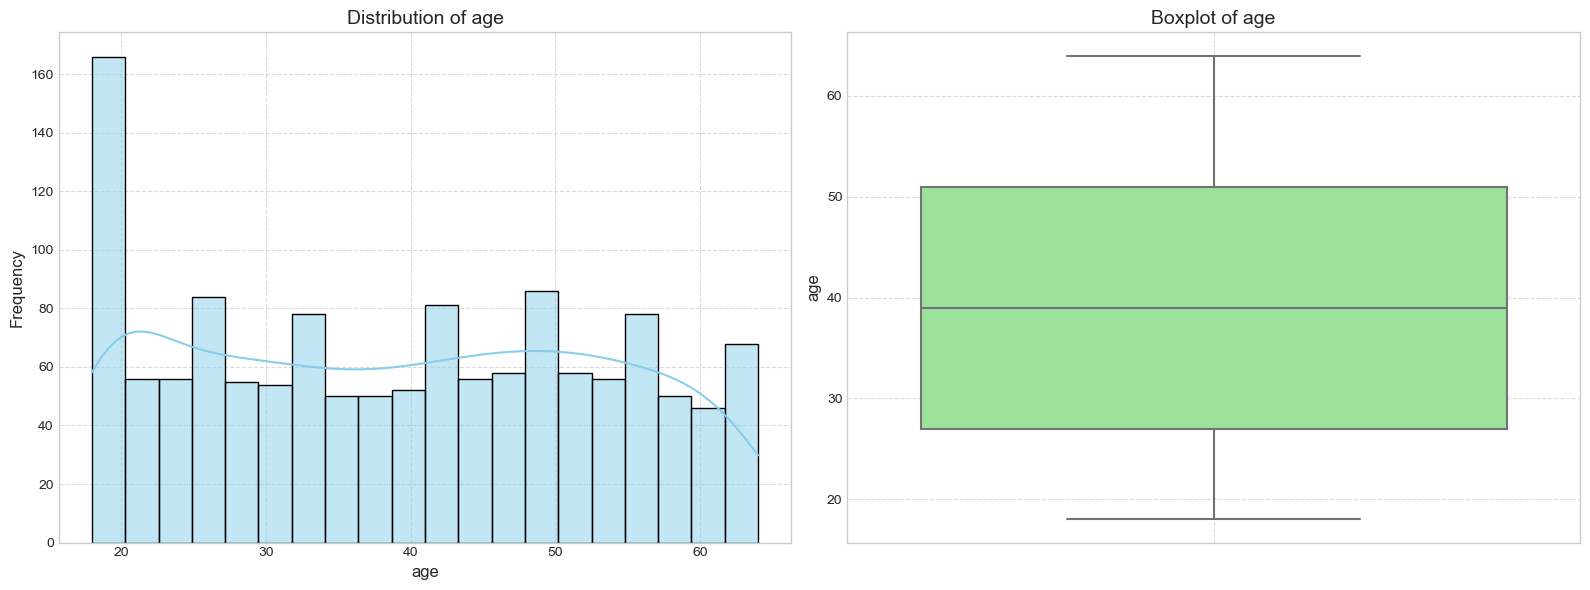


Statistics for 'bmi':
count   1338.0000
mean      30.6634
std        6.0982
min       15.9600
25%       26.2963
50%       30.4000
75%       34.6938
max       53.1300
Name: bmi, dtype: float64


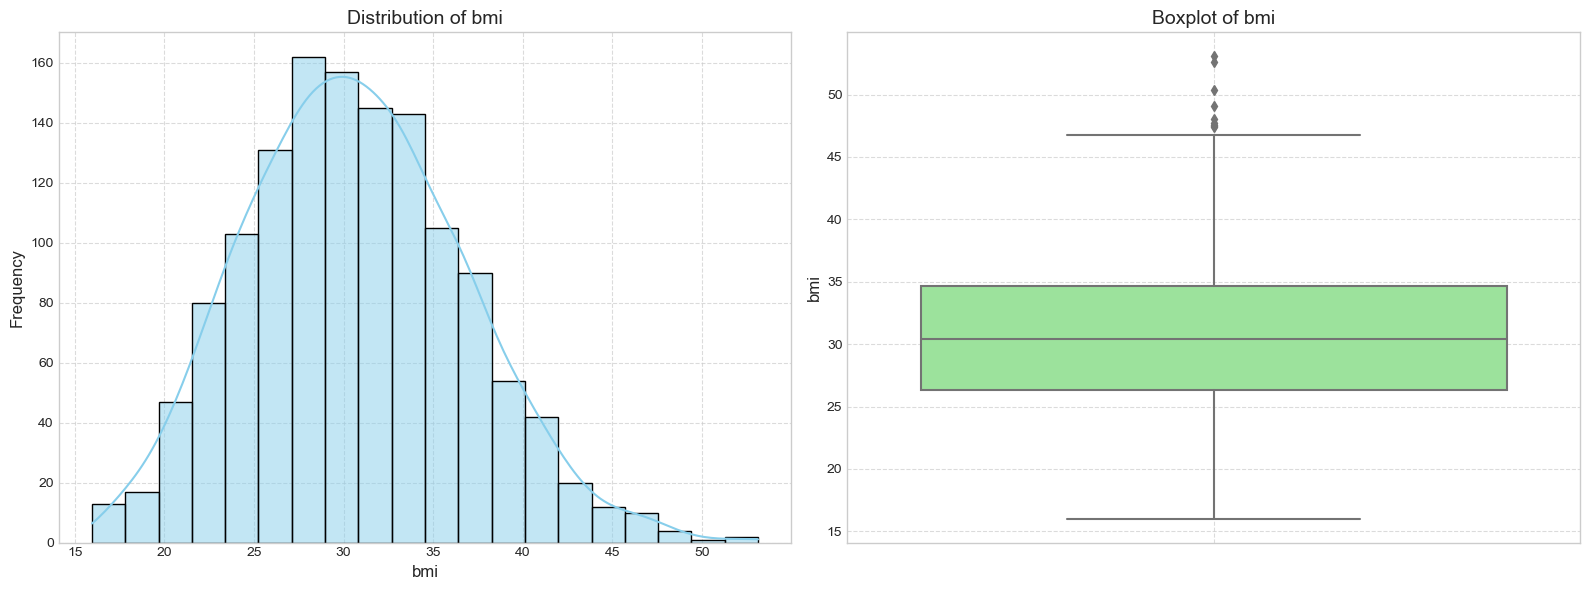


Statistics for 'charges':
count    1338.0000
mean    13270.4223
std     12110.0112
min      1121.8739
25%      4740.2872
50%      9382.0330
75%     16639.9125
max     63770.4280
Name: charges, dtype: float64


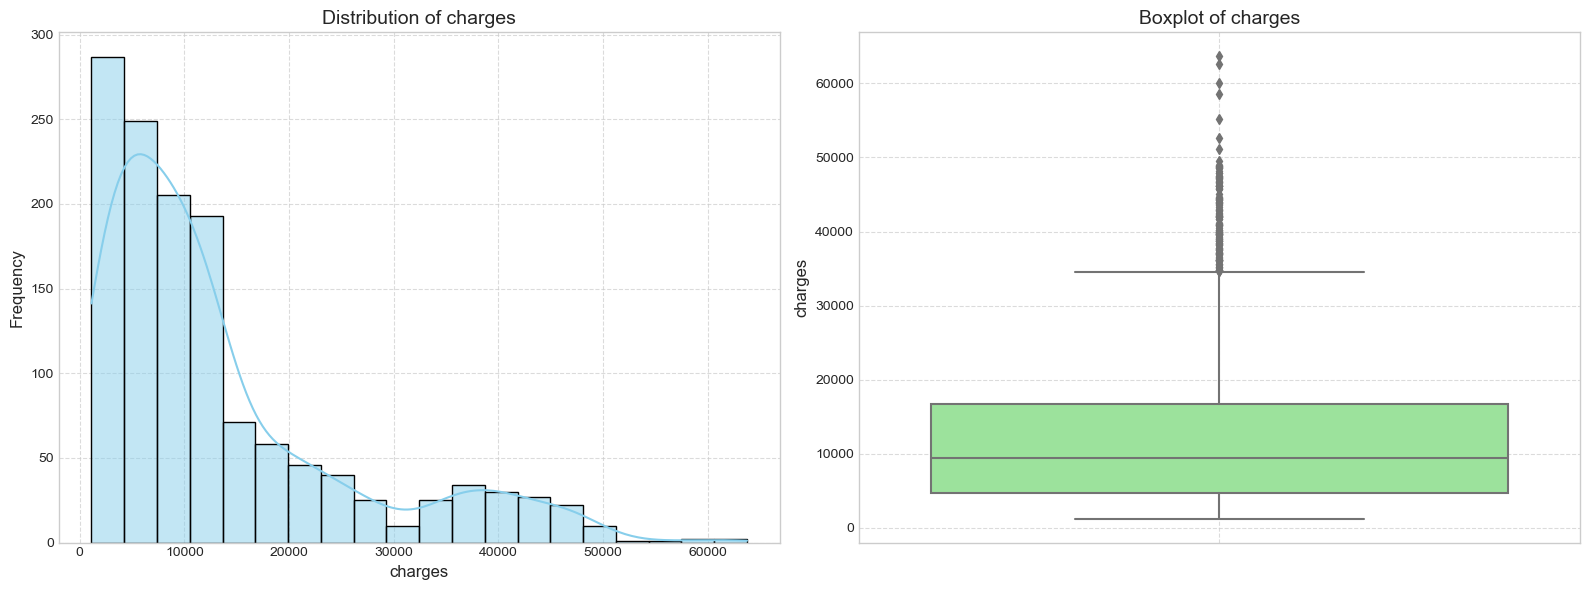


Continuous columns identified: ['age', 'bmi', 'charges']


In [100]:
print("\n----- Continuous Variables Analysis -----")
continuous_columns = []

for column in df.columns:
    if column not in categorical_columns:
        continuous_columns.append(column)
        
        # Display basic statistics
        print(f"\nStatistics for '{column}':")
        print(df[column].describe())
        
        # Create a figure with subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Plot histogram
        sns.histplot(df[column], bins=20, kde=True, ax=ax1, color='skyblue', edgecolor='black')
        ax1.set_title(f'Distribution of {column}', fontsize=14)
        ax1.set_xlabel(column, fontsize=12)
        ax1.set_ylabel('Frequency', fontsize=12)
        ax1.grid(True, linestyle='--', alpha=0.7)
        
        # Plot boxplot
        sns.boxplot(y=df[column], ax=ax2, color='lightgreen')
        ax2.set_title(f'Boxplot of {column}', fontsize=14)
        ax2.set_ylabel(column, fontsize=12)
        ax2.grid(True, linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        plt.savefig(f'{column}_analysis.png')  # Save the figure
        plt.show()

print(f"\nContinuous columns identified: {continuous_columns}")


# 5. OUTLIER DETECTION (IQR METHOD)


----- Outlier Detection (IQR Method) -----

Outliers in column 'bmi':
Number of outliers: 9 (0.67%)
IQR boundaries: Lower = 13.70, Upper = 47.29
Statistics of outliers:
count    9.0000
mean    49.2767
std      2.2423
min     47.4100
25%     47.6000
50%     48.0700
75%     50.3800
max     53.1300
Name: bmi, dtype: float64


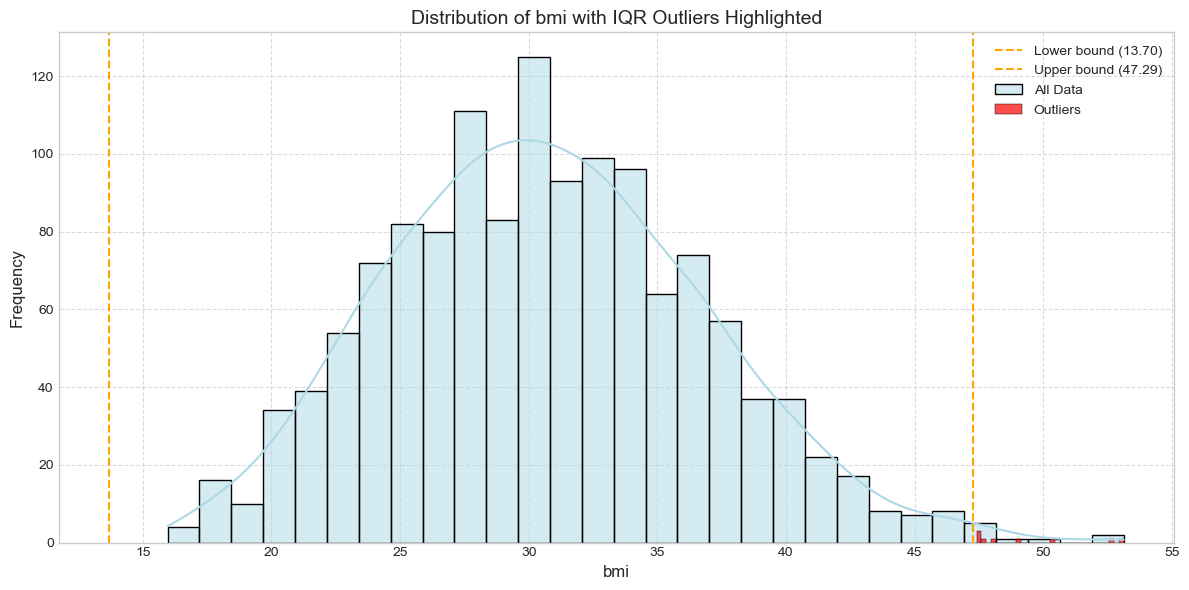


Outliers in column 'charges':
Number of outliers: 139 (10.39%)
IQR boundaries: Lower = -13109.15, Upper = 34489.35
Statistics of outliers:
count     139.0000
mean    42103.9472
std      5582.1681
min     34617.8406
25%     37786.1499
50%     40974.1649
75%     45786.7064
max     63770.4280
Name: charges, dtype: float64


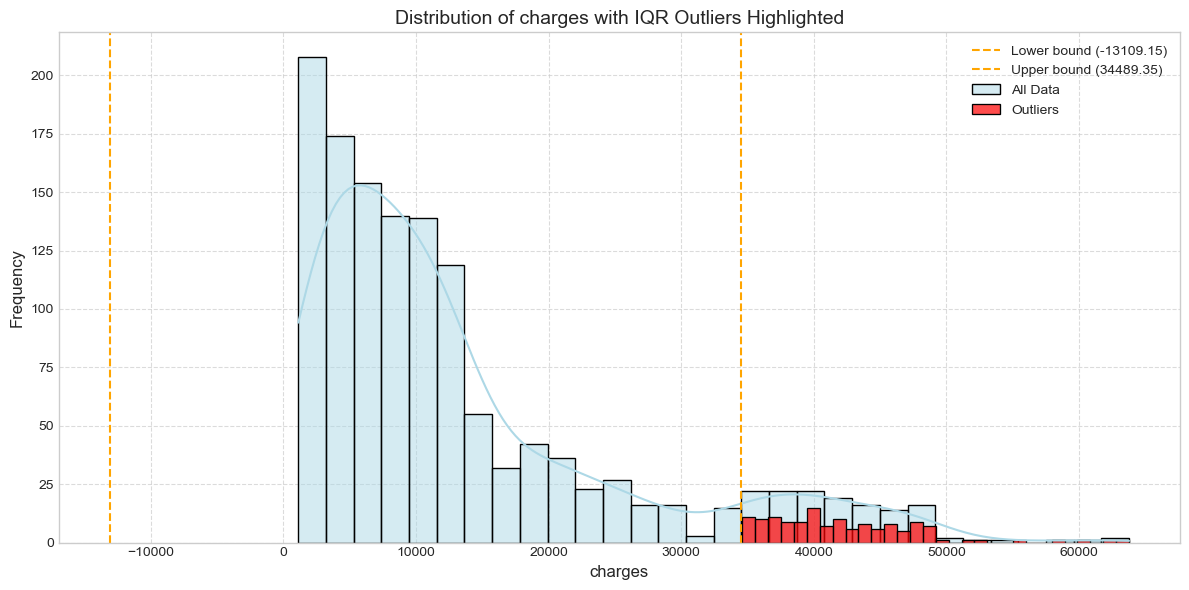


----- Outliers Summary (IQR Method) -----
         Total Outliers Percentage (%) Lower Bound Upper Bound
age                   0         0.0000     -9.0000     87.0000
bmi                   9         0.6700     13.7000     47.2900
children              0         0.0000     -3.0000      5.0000
charges             139        10.3900 -13109.1500  34489.3500

----- Rows with Multiple Outliers (IQR Method) -----
Found 3 rows with multiple outliers:
      age     sex     bmi  children smoker     region    charges
543    54  female 47.4100         0    yes  southeast 63770.4280
860    37  female 47.6000         2    yes  southwest 46113.5110
1047   22    male 52.5800         1    yes  southeast 44501.3982


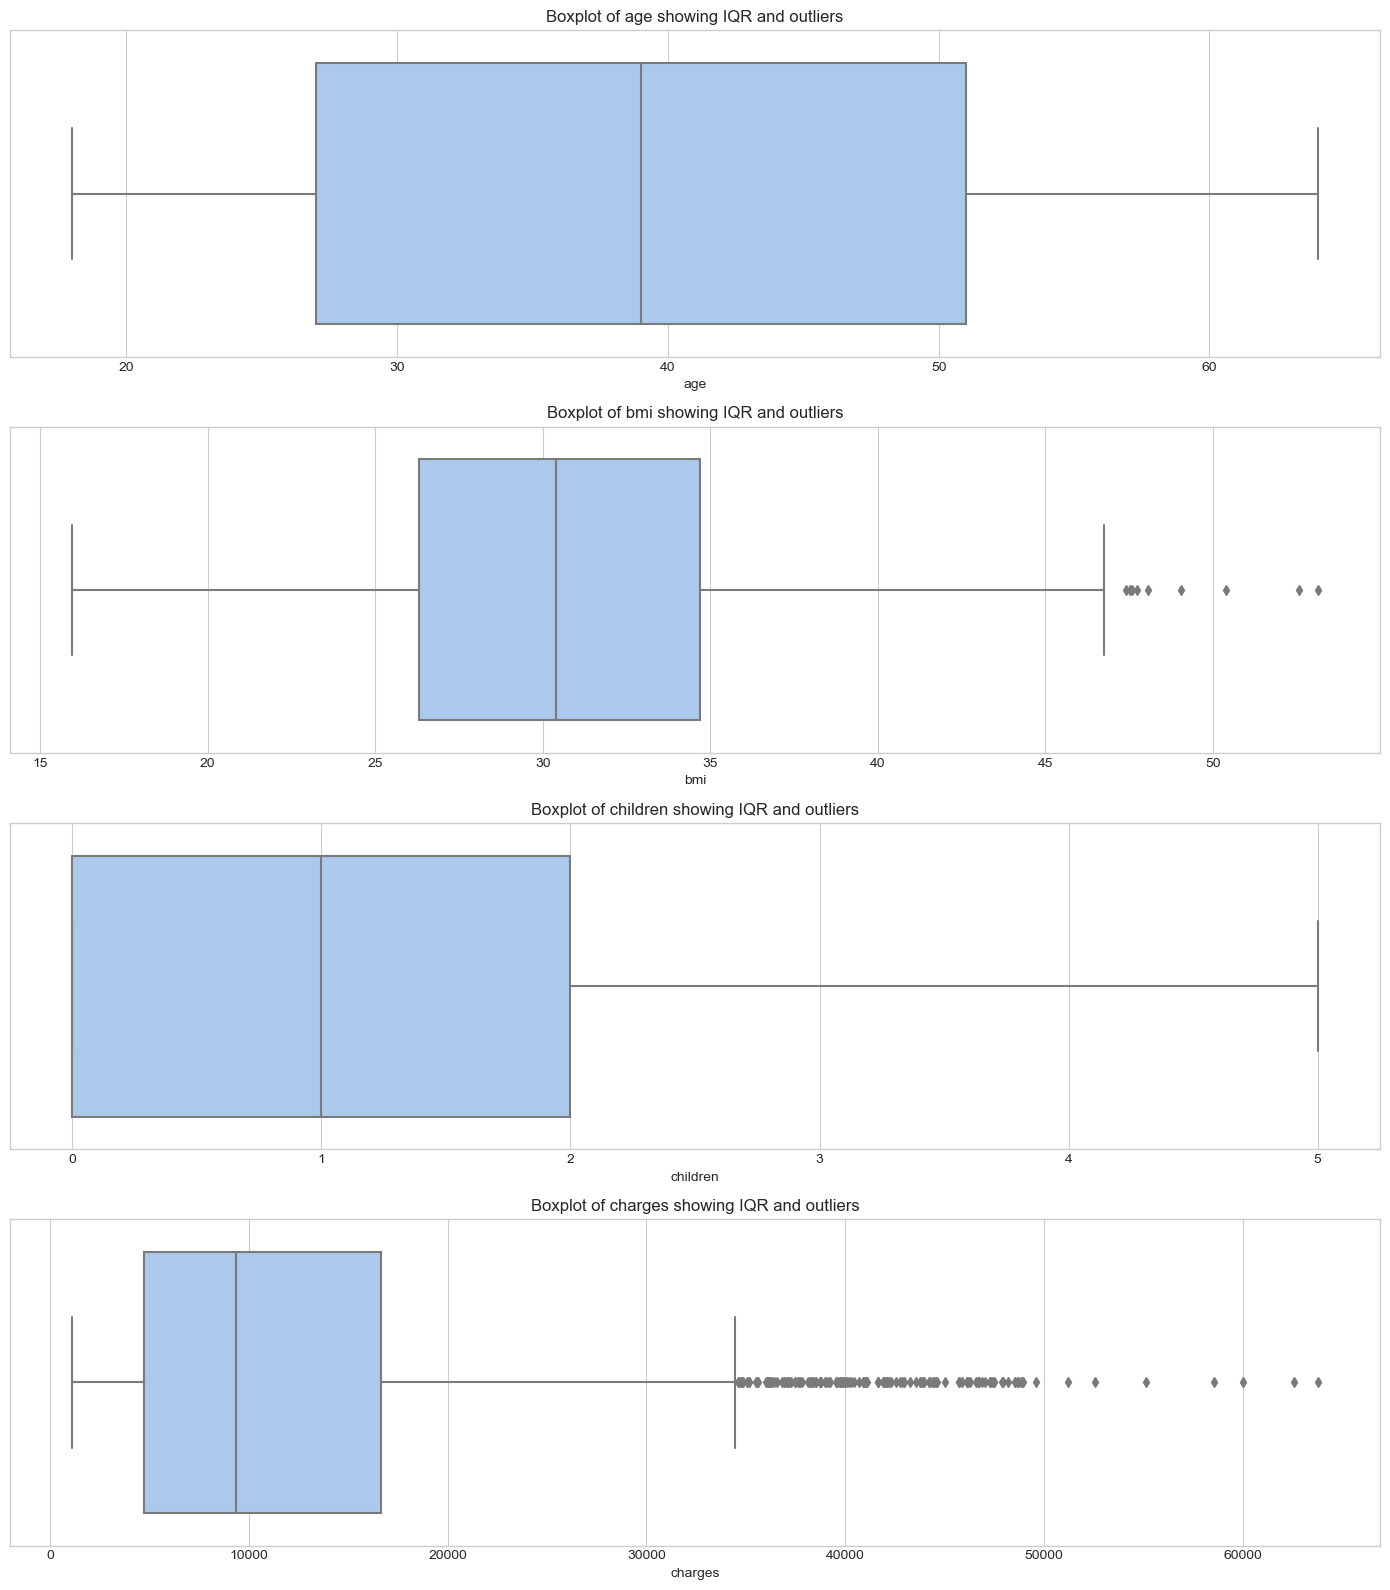

In [101]:
print("\n----- Outlier Detection (IQR Method) -----")
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, multiplier=1.5):
    """
    Detect outliers in a dataset using the Interquartile Range (IQR) method.
    
    Parameters:
    -----------
    data : pandas.Series
        The data to check for outliers
    multiplier : float, default=1.5
        The multiplier for the IQR (typically 1.5)
        
    Returns:
    --------
    pandas.Series
        Boolean series indicating whether each point is an outlier
    """
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    return (data < lower_bound) | (data > upper_bound)

# Detect outliers in all numeric columns and create a summary
outliers_summary = pd.DataFrame(index=numeric_columns, columns=['Total Outliers', 'Percentage (%)', 'Lower Bound', 'Upper Bound'])

for column in numeric_columns:
    # Calculate IQR bounds
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Detect outliers using IQR
    outliers = detect_outliers_iqr(df[column])
    outlier_count = outliers.sum()
    outlier_percentage = (outlier_count / len(df)) * 100
    
    # Update the summary DataFrame
    outliers_summary.loc[column, 'Total Outliers'] = outlier_count
    outliers_summary.loc[column, 'Percentage (%)'] = round(outlier_percentage, 2)
    outliers_summary.loc[column, 'Lower Bound'] = round(lower_bound, 2)
    outliers_summary.loc[column, 'Upper Bound'] = round(upper_bound, 2)
    
    if outlier_count > 0:
        print(f"\nOutliers in column '{column}':")
        print(f"Number of outliers: {outlier_count} ({outlier_percentage:.2f}%)")
        print(f"IQR boundaries: Lower = {lower_bound:.2f}, Upper = {upper_bound:.2f}")
        print("Statistics of outliers:")
        print(df[outliers][column].describe())
        
        # Plot the distribution with outliers highlighted
        plt.figure(figsize=(12, 6))
        sns.histplot(df[column], bins=30, kde=True, color='lightblue', label='All Data')
        if outlier_count > 0:
            sns.histplot(df[outliers][column], bins=30, color='red', alpha=0.7, label='Outliers')
        
        # Add vertical lines for the IQR boundaries
        plt.axvline(x=lower_bound, color='orange', linestyle='--', 
                   label=f'Lower bound ({lower_bound:.2f})')
        plt.axvline(x=upper_bound, color='orange', linestyle='--', 
                   label=f'Upper bound ({upper_bound:.2f})')
        
        plt.title(f'Distribution of {column} with IQR Outliers Highlighted', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(f'{column}_iqr_outliers.png')  # Save the figure
        plt.show()

# Print the outliers summary
print("\n----- Outliers Summary (IQR Method) -----")
print(outliers_summary)

# Detect rows with multiple outliers
print("\n----- Rows with Multiple Outliers (IQR Method) -----")
outliers_all = df[numeric_columns].apply(detect_outliers_iqr)
rows_with_outliers = outliers_all.sum(axis=1)
multi_outlier_rows = rows_with_outliers[rows_with_outliers > 1]

if len(multi_outlier_rows) > 0:
    print(f"Found {len(multi_outlier_rows)} rows with multiple outliers:")
    print(df.loc[multi_outlier_rows.index])
else:
    print("No rows with multiple outliers found.")

# Optional: Create a boxplot visualization for each numeric column
plt.figure(figsize=(14, len(numeric_columns)*4))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} showing IQR and outliers')
    plt.tight_layout()
plt.savefig('boxplots_outliers.png')  # Save all boxplots
plt.show()

In [102]:
# Check for missing data
print("Missing data before imputation:\n", df.isnull().sum())
print("Data set after verifying no missing values:\n", df.head())

Missing data before imputation:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Data set after verifying no missing values:
    age     sex     bmi  children smoker     region    charges
0   19  female 27.9000         0    yes  southwest 16884.9240
1   18    male 33.7700         1     no  southeast  1725.5523
2   28    male 33.0000         3     no  southeast  4449.4620
3   33    male 22.7050         0     no  northwest 21984.4706
4   32    male 28.8800         0     no  northwest  3866.8552


In [103]:
def replace_outliers_with_median(df):
    """
    Replaces outliers with the median value using the IQR method.
    
    Parameters:
    df : pandas DataFrame
        The dataset
    
    Returns:
    df_transformed : pandas DataFrame
        The dataset with outliers replaced
    """
    df_transformed = df.copy()
    numeric_columns = df_transformed.select_dtypes(include=[np.number]).columns
    
    for col in numeric_columns:
        Q1 = df_transformed[col].quantile(0.25)
        Q3 = df_transformed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = df_transformed[col].median()
        
        df_transformed[col] = np.where((df_transformed[col] < lower_bound) | 
                                       (df_transformed[col] > upper_bound), 
                                       median_value, 
                                       df_transformed[col])
    
    return df_transformed

df_median_outliers = replace_outliers_with_median(df)
print("Dataset after replacing outliers with median:\n", df_median_outliers.shape)


Dataset after replacing outliers with median:
 (1338, 7)


In [104]:
# Define categorical columns
categorical_columns = ['sex', 'children', 'smoker', 'region']

# Dictionary to store mappings
category_mappings = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    category_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mappings for reference
print("\nCategorical Data Mapping to Numerical Intervals:")
for col, mapping in category_mappings.items():
    print(f"{col}: {mapping}")

# Display the modified DataFrame
print("\nUpdated DataFrame:")
print(df.head())



Categorical Data Mapping to Numerical Intervals:
sex: {'female': 0, 'male': 1}
children: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
smoker: {'no': 0, 'yes': 1}
region: {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}

Updated DataFrame:
   age  sex     bmi  children  smoker  region    charges
0   19    0 27.9000         0       1       3 16884.9240
1   18    1 33.7700         1       0       2  1725.5523
2   28    1 33.0000         3       0       2  4449.4620
3   33    1 22.7050         0       0       1 21984.4706
4   32    1 28.8800         0       0       1  3866.8552


# 6. FEATURE IMPORTANCE ANALYSIS

In [105]:
# Determine the target variable (assuming 'charges' is the target)
target_column = 'charges'
feature_columns = [col for col in df.columns if col != target_column]

print(f"Target variable: {target_column}")
print(f"Feature variables: {feature_columns}")

Target variable: charges
Feature variables: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


# 6.1. CLUSTERING MODEL FOR TARGET BINNING


In [106]:
# Reshape the target variable for K-Means (needs to be 2D)
X_target = df[target_column].values.reshape(-1, 1)

# Find optimal number of clusters using SSE (Elbow Method)
sse = []
max_clusters = 10  # Maximum number of clusters to try
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_target)
    sse.append(kmeans.inertia_)

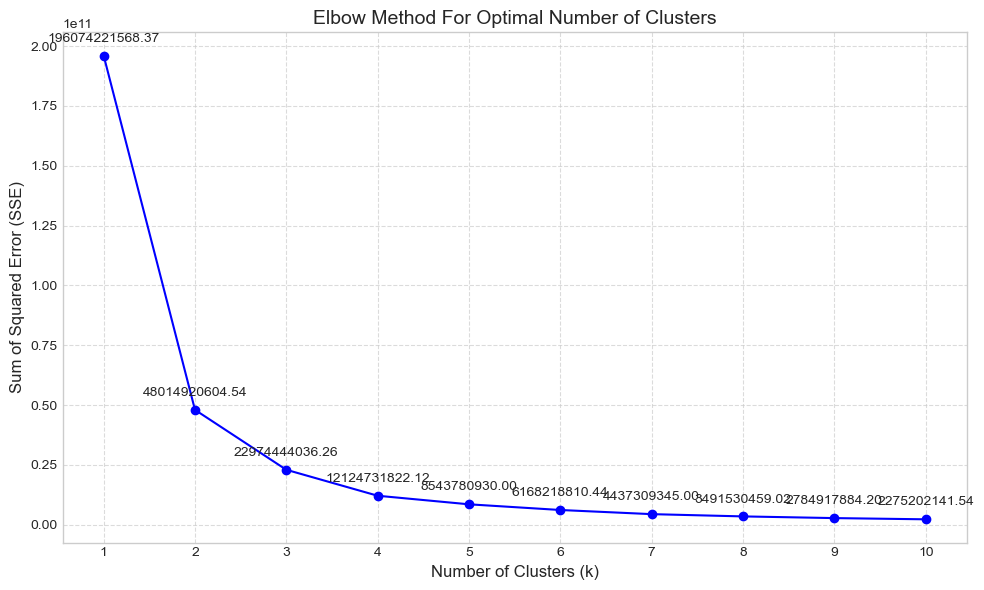

In [107]:
# 6.1.1. SSE-NUMBER PLOT CHART
# Plot SSE vs. Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), sse, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Sum of Squared Error (SSE)', fontsize=12)
plt.title('Elbow Method For Optimal Number of Clusters', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, max_clusters + 1))

# Add annotations to the plot
for i, value in enumerate(sse):
    plt.annotate(f'{value:.2f}', (i + 1, value), textcoords="offset points", 
                 xytext=(0,10), ha='center')

plt.tight_layout()
plt.savefig('clustering_elbow_plot.png')
plt.show()

In [108]:
# Determine optimal number of clusters (this is a simplified approach - you can refine this)
# Calculate the percentage change in SSE
sse_changes = [100 * (sse[i-1] - sse[i]) / sse[i-1] for i in range(1, len(sse))]
sse_changes = [0] + sse_changes  # Add 0 for the first cluster

# Find the point where the SSE change starts to flatten
threshold = 15  # Percentage threshold for significant change
optimal_clusters = 0

for i, change in enumerate(sse_changes):
    if i > 0 and change < threshold:
        optimal_clusters = i
        break

if optimal_clusters == 0:
    # Fallback if no clear elbow is found
    optimal_clusters = 3  # Default to 3 clusters if no clear optimal number is found

print(f"Optimal number of clusters based on elbow method: {optimal_clusters}")



Optimal number of clusters based on elbow method: 3


In [109]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['charges_cluster'] = kmeans.fit_predict(X_target)

# Print the cluster centers (average charge in each cluster)
cluster_centers = kmeans.cluster_centers_
print("\nCluster Centers (Average Charges):")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}: ${center[0]:.2f}")

# Print cluster sizes
cluster_sizes = df['charges_cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_sizes)


Cluster Centers (Average Charges):
Cluster 0: $6437.24
Cluster 1: $40761.31
Cluster 2: $18919.13

Cluster Sizes:
0    888
2    288
1    162
Name: charges_cluster, dtype: int64


In [110]:
# Use KBinsDiscretizer for binning with the optimal number of clusters
binner = KBinsDiscretizer(n_bins=optimal_clusters, encode='ordinal', strategy='kmeans')
df['charges_binned'] = binner.fit_transform(X_target)

# Display bin edges
bin_edges = binner.bin_edges_[0]
print("Bin edges from KBinsDiscretizer:")
for i in range(len(bin_edges) - 1):
    print(f"Bin {i}: ${bin_edges[i]:.2f} to ${bin_edges[i+1]:.2f}")

Bin edges from KBinsDiscretizer:
Bin 0: $1121.87 to $13410.25
Bin 1: $13410.25 to $30592.86
Bin 2: $30592.86 to $63770.43


# 6.2. DECISION TREE MODEL


In [111]:
# 6.2.1. TOP 10 ROWS OF CATEGORIZED TARGET
print("\nTop 10 rows with original and categorized target:")
print(df[['charges', 'charges_cluster', 'charges_binned']].head(10))

# Use the clustered target as the classification target
X = df[feature_columns]
y = df['charges_cluster']  # Using the cluster labels as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Evaluate the model
print("\nDecision Tree Model Evaluation:")
y_pred = dt_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Top 10 rows with original and categorized target:
     charges  charges_cluster  charges_binned
0 16884.9240                2          1.0000
1  1725.5523                0          0.0000
2  4449.4620                0          0.0000
3 21984.4706                2          1.0000
4  3866.8552                0          0.0000
5  3756.6216                0          0.0000
6  8240.5896                0          0.0000
7  7281.5056                0          0.0000
8  6406.4107                0          0.0000
9 28923.1369                2          1.0000

Decision Tree Model Evaluation:
[[194   2  27]
 [  1  39   2]
 [ 21   1  48]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       223
           1       0.93      0.93      0.93        42
           2       0.62      0.69      0.65        70

    accuracy                           0.84       335
   macro avg       0.82      0.83      0.82       335
weighted avg       0.84      0.84     

# 6.3. FEATURE IMPORTANCE



Feature Importance:
    Feature  Importance
4    smoker      0.3512
2       bmi      0.3187
0       age      0.2317
3  children      0.0546
5    region      0.0278
1       sex      0.0160


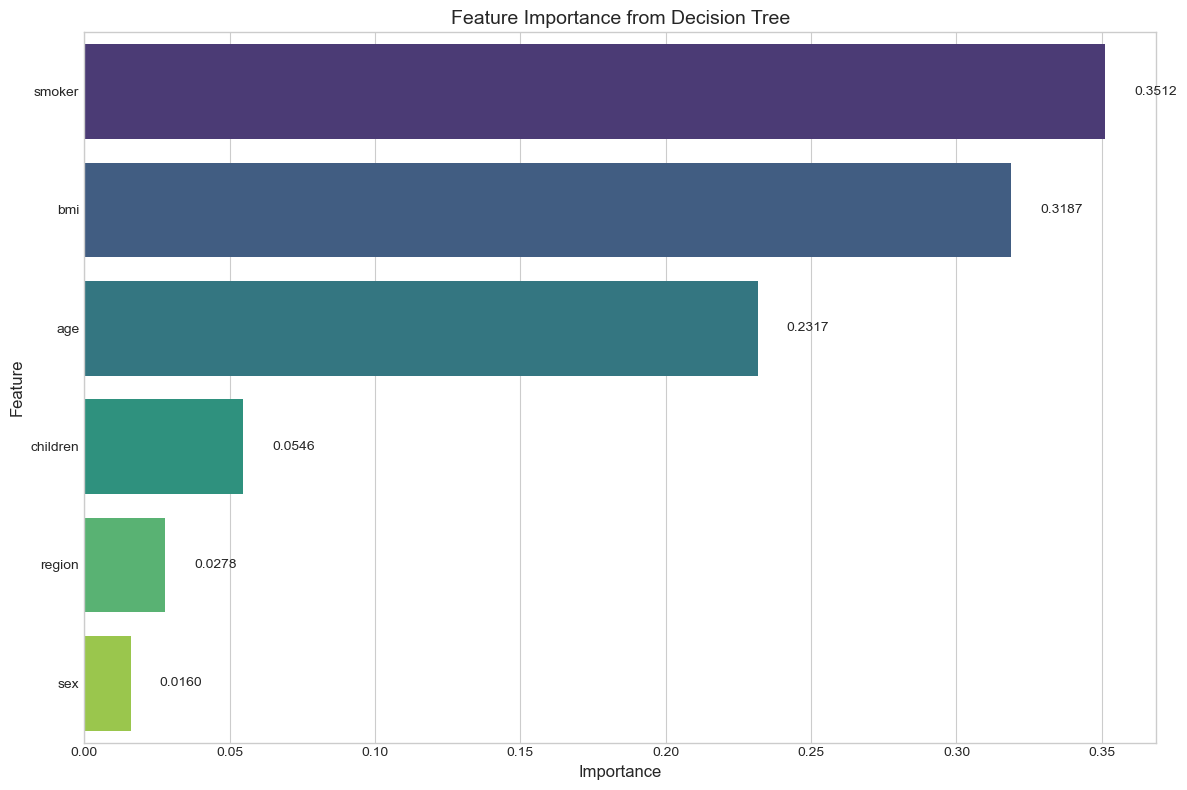

In [112]:
# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': dt_classifier.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Decision Tree', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add value labels to the bars
for i, v in enumerate(feature_importance['Importance']):
    ax.text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

In [113]:
# Optional: Cross-validation to check model stability
print("\nCross-Validation Scores:")
cv_scores = cross_val_score(dt_classifier, X, y, cv=5)
print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Optional: Hyperparameter tuning to optimize the decision tree
print("\nHyperparameter Tuning:")
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Cross-Validation Scores:
CV Accuracy: 0.8401 ± 0.0274

Hyperparameter Tuning:
Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.9088


In [114]:
# Train the best model
best_dt = grid_search.best_estimator_
best_dt.fit(X, y)

# Re-calculate feature importance with the best model
best_feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': best_dt.feature_importances_
})

# Sort features by importance
best_feature_importance = best_feature_importance.sort_values('Importance', ascending=False)

print("\nOptimized Feature Importance:")
print(best_feature_importance)


Optimized Feature Importance:
    Feature  Importance
4    smoker      0.4840
2       bmi      0.2563
0       age      0.2321
5    region      0.0177
3  children      0.0092
1       sex      0.0008


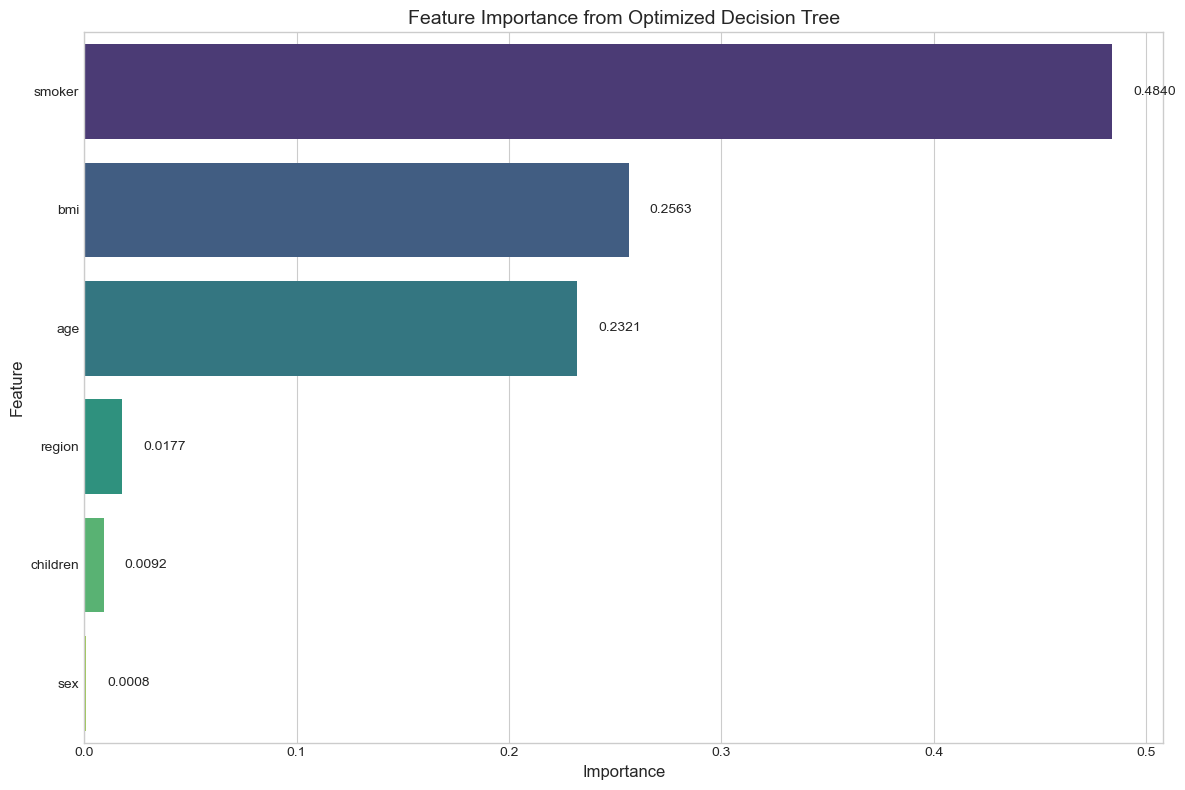

In [115]:
# Plot feature importance from the best model
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Importance', y='Feature', data=best_feature_importance, palette='viridis')
plt.title('Feature Importance from Optimized Decision Tree', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add value labels to the bars
for i, v in enumerate(best_feature_importance['Importance']):
    ax.text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.savefig('best_feature_importance.png')
plt.show()

In [116]:
# Create a summary of findings
print("\n----- Summary of Feature Importance Analysis -----")
print(f"1. Target variable '{target_column}' was binned into {optimal_clusters} categories using KMeans clustering")
print(f"2. Decision Tree model achieved cross-validation accuracy of {cv_scores.mean():.4f}")
print(f"3. The most important features for predicting insurance charges are:")
for idx, row in best_feature_importance.head(3).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")
print("4. See generated plots for visual analysis of clustering and feature importance")


----- Summary of Feature Importance Analysis -----
1. Target variable 'charges' was binned into 3 categories using KMeans clustering
2. Decision Tree model achieved cross-validation accuracy of 0.8401
3. The most important features for predicting insurance charges are:
   - smoker: 0.4840
   - bmi: 0.2563
   - age: 0.2321
4. See generated plots for visual analysis of clustering and feature importance


# 7. PREDICTIVE MODEL


In [117]:
# 7.1. INPUT VARIABLES AND TARGET VALUE
# Using the important features identified earlier
# and the original target (charges)

# Identify important features from earlier analysis
# Let's use the top features identified by the decision tree
top_features = best_feature_importance.head(5)['Feature'].tolist()
print("\nTop features selected for regression model:")
print(top_features)



Top features selected for regression model:
['smoker', 'bmi', 'age', 'region', 'children']


In [118]:
# Define X (features) and y (target) for regression model
X_reg = df[top_features]
y_reg = df[target_column]  # Original charges (not the binned or clustered version)

print("\nInput variables shape:", X_reg.shape)
print("Target variable shape:", y_reg.shape)
print("\nFirst few rows of input variables:")
print(X_reg.head())
print("\nFirst few values of target variable:")
print(y_reg.head())



Input variables shape: (1338, 5)
Target variable shape: (1338,)

First few rows of input variables:
   smoker     bmi  age  region  children
0       1 27.9000   19       3         0
1       0 33.7700   18       2         1
2       0 33.0000   28       2         3
3       0 22.7050   33       1         0
4       0 28.8800   32       1         0

First few values of target variable:
0   16884.9240
1    1725.5523
2    4449.4620
3   21984.4706
4    3866.8552
Name: charges, dtype: float64


In [119]:
# 7.2. GENERALIZATION/STANDARDIZATION OF THE DATA
from sklearn.preprocessing import StandardScaler

# Create a scaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_reg_scaled = pd.DataFrame(scaler.fit_transform(X_reg), 
                           columns=X_reg.columns,
                           index=X_reg.index)

print("\nScaled input variables (first few rows):")
print(X_reg_scaled.head())
print("\nStatistics of scaled variables:")
print(X_reg_scaled.describe())


Scaled input variables (first few rows):
   smoker     bmi     age  region  children
0  1.9706 -0.4533 -1.4388  1.3439   -0.9086
1 -0.5075  0.5096 -1.5100  0.4385   -0.0788
2 -0.5075  0.3833 -0.7980  0.4385    1.5809
3 -0.5075 -1.3055 -0.4419 -0.4669   -0.9086
4 -0.5075 -0.2926 -0.5131 -0.4669   -0.9086

Statistics of scaled variables:
         smoker       bmi       age    region  children
count 1338.0000 1338.0000 1338.0000 1338.0000 1338.0000
mean     0.0000   -0.0000   -0.0000    0.0000   -0.0000
std      1.0004    1.0004    1.0004    1.0004    1.0004
min     -0.5075   -2.4120   -1.5100   -1.3723   -0.9086
25%     -0.5075   -0.7164   -0.8692   -0.4669   -0.9086
50%     -0.5075   -0.0432   -0.0147    0.4385   -0.0788
75%     -0.5075    0.6612    0.8397    0.4385    0.7511
max      1.9706    3.6855    1.7653    1.3439    3.2406


In [120]:
# 7.3. SHAPE OF TRAIN AND TEST DATA SET
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42)

print("\nTraining set shape:")
print(f"X_train: {X_train_reg.shape}, y_train: {y_train_reg.shape}")
print("\nTest set shape:")
print(f"X_test: {X_test_reg.shape}, y_test: {y_test_reg.shape}")



Training set shape:
X_train: (1070, 5), y_train: (1070,)

Test set shape:
X_test: (268, 5), y_test: (268,)


In [121]:
# 7.4. REGRESSION MODEL
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math


# 8. EVALUATION


In [122]:
# 8.1. CHOOSE PARAMETERS FOR IMPACT ON PERFORMANCE
# We'll try different regression models with various parameters

# Define a function to evaluate and display model results
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train a model, make predictions, and evaluate performance
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_rmse = math.sqrt(train_mse)
    test_rmse = math.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    # Print results
    print(f"\n--- {model_name} Results ---")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Testing R²: {test_r2:.4f}")
    print(f"Training RMSE: ${train_rmse:.2f}")
    print(f"Testing RMSE: ${test_rmse:.2f}")
    print(f"Training MAE: ${train_mae:.2f}")
    print(f"Testing MAE: ${test_mae:.2f}")
    
    # For linear models, display coefficients
    if hasattr(model, 'coef_'):
        coefficients = pd.DataFrame({
            'Feature': X_train.columns,
            'Coefficient': model.coef_
        })
        print("\nModel Coefficients:")
        print(coefficients.sort_values('Coefficient', ascending=False))
        
        # Construct regression formula
        intercept = model.intercept_
        formula = f"charges = {intercept:.2f}"
        for feature, coef in zip(X_train.columns, model.coef_):
            sign = "+" if coef >= 0 else ""
            formula += f" {sign} {coef:.2f} × {feature}"
        print("\nRegression formula:")
        print(formula)
    
    return {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae
    }



In [123]:
# 8.2. DEVELOP AT LEAST THREE REGRESSION MODELS

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_results = evaluate_model(lr_model, X_train_reg, X_test_reg, y_train_reg, y_test_reg, "Linear Regression")

# Model 2: Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)
ridge_results = evaluate_model(ridge_model, X_train_reg, X_test_reg, y_train_reg, y_test_reg, "Ridge Regression (alpha=1.0)")

# Model 3: Lasso Regression (L1 regularization)
lasso_model = Lasso(alpha=0.1)
lasso_results = evaluate_model(lasso_model, X_train_reg, X_test_reg, y_train_reg, y_test_reg, "Lasso Regression (alpha=0.1)")

# Model 4: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_results = evaluate_model(rf_model, X_train_reg, X_test_reg, y_train_reg, y_test_reg, "Random Forest Regressor")

# Model 5: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_results = evaluate_model(gb_model, X_train_reg, X_test_reg, y_train_reg, y_test_reg, "Gradient Boosting Regressor")


--- Linear Regression Results ---
Training R²: 0.7417
Testing R²: 0.7833
Training RMSE: $6105.80
Testing RMSE: $5800.06
Training MAE: $4208.73
Testing MAE: $4187.32

Model Coefficients:
    Feature  Coefficient
0    smoker    9542.2571
2       age    3610.3534
1       bmi    2046.7076
4  children     512.0996
3    region    -299.4554

Regression formula:
charges = 13315.32 + 9542.26 × smoker + 2046.71 × bmi + 3610.35 × age  -299.46 × region + 512.10 × children

--- Ridge Regression (alpha=1.0) Results ---
Training R²: 0.7417
Testing R²: 0.7833
Training RMSE: $6105.80
Testing RMSE: $5800.59
Training MAE: $4209.87
Testing MAE: $4188.71

Model Coefficients:
    Feature  Coefficient
0    smoker    9533.1859
2       age    3606.7101
1       bmi    2045.0783
4  children     511.9730
3    region    -298.9413

Regression formula:
charges = 13315.35 + 9533.19 × smoker + 2045.08 × bmi + 3606.71 × age  -298.94 × region + 511.97 × children

--- Lasso Regression (alpha=0.1) Results ---
Training R²

In [124]:
# 8.3. COMPARE R-SQUARED VALUES AND PICK THE BEST MODEL

# Collect all results
all_models = [
    lr_results,
    ridge_results,
    lasso_results,
    rf_results,
    gb_results
]

# Create a comparison DataFrame
model_names = ["Linear Regression", "Ridge Regression", "Lasso Regression", 
              "Random Forest", "Gradient Boosting"]
model_comparison = pd.DataFrame({
    'Model': model_names,
    'Training R²': [model['train_r2'] for model in all_models],
    'Testing R²': [model['test_r2'] for model in all_models],
    'Training RMSE': [model['train_rmse'] for model in all_models],
    'Testing RMSE': [model['test_rmse'] for model in all_models]
})

print("\n----- Model Comparison -----")
print(model_comparison.sort_values('Testing R²', ascending=False))



----- Model Comparison -----
               Model  Training R²  Testing R²  Training RMSE  Testing RMSE
4  Gradient Boosting       0.8986      0.8790      3825.9394     4334.4557
3      Random Forest       0.9740      0.8688      1936.9697     4513.7608
0  Linear Regression       0.7417      0.7833      6105.7965     5800.0566
2   Lasso Regression       0.7417      0.7833      6105.7965     5800.0739
1   Ridge Regression       0.7417      0.7833      6105.8044     5800.5903


<Figure size 1400x800 with 0 Axes>

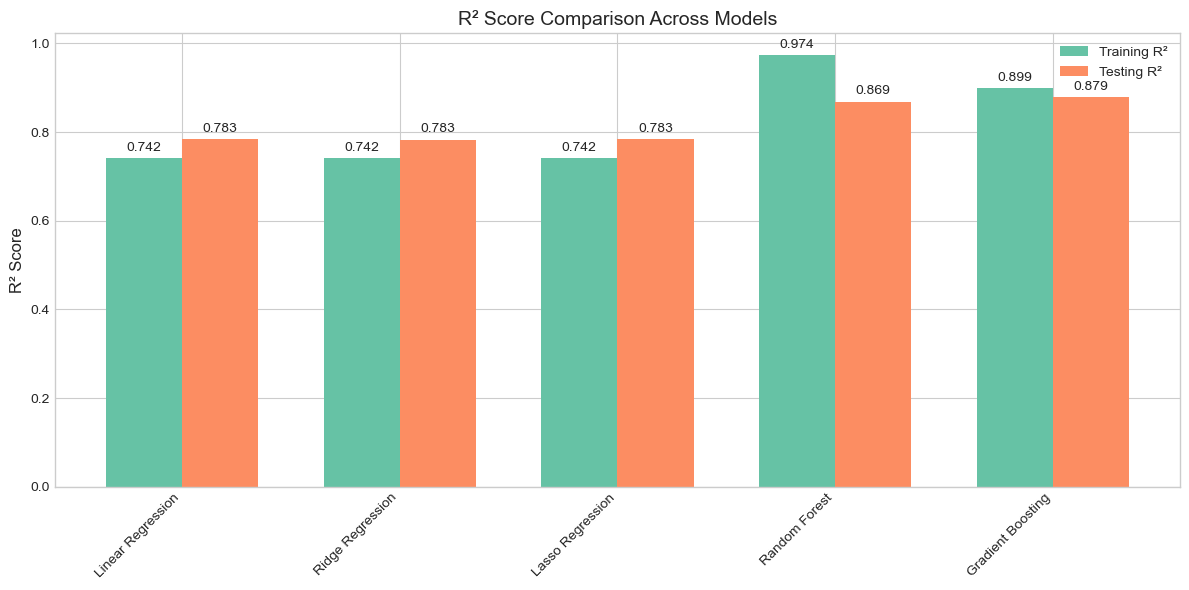

In [125]:
# Create comparison visualizations

# Set a consistent style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# 1. Bar chart for R-squared comparison
plt.figure(figsize=(14, 8))

# Create a grouped bar chart
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, model_comparison['Training R²'], width, label='Training R²')
rects2 = ax.bar(x + width/2, model_comparison['Testing R²'], width, label='Testing R²')

# Add labels and title
ax.set_ylabel('R² Score', fontsize=12)
ax.set_title('R² Score Comparison Across Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# Add value labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.savefig('r_squared_comparison.png')
plt.show()


In [126]:
# Find the best model based on test R²
best_model_idx = model_comparison['Testing R²'].idxmax()
best_model_name = model_comparison.loc[best_model_idx, 'Model']
best_model = all_models[best_model_idx]['model']

print(f"\nBest performing model: {best_model_name}")
print(f"Test R²: {model_comparison.loc[best_model_idx, 'Testing R²']:.4f}")
print(f"Test RMSE: ${model_comparison.loc[best_model_idx, 'Testing RMSE']:.2f}")



Best performing model: Gradient Boosting
Test R²: 0.8790
Test RMSE: $4334.46


# 8.4. REGRESSION RESULTS FOR THE BEST MODEL - GRADIENT BOOSTING


In [127]:
# Since Gradient Boosting is a tree-based model, display feature importances
best_model_name = "Gradient Boosting"
best_model = gb_model  # Ensure we're using the Gradient Boosting model
importances = pd.DataFrame({
        'Feature': X_train_reg.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
print("\nFeature Importances:")
print(importances)
    
    


Feature Importances:
    Feature  Importance
0    smoker      0.6772
1       bmi      0.1904
2       age      0.1170
4  children      0.0120
3    region      0.0034


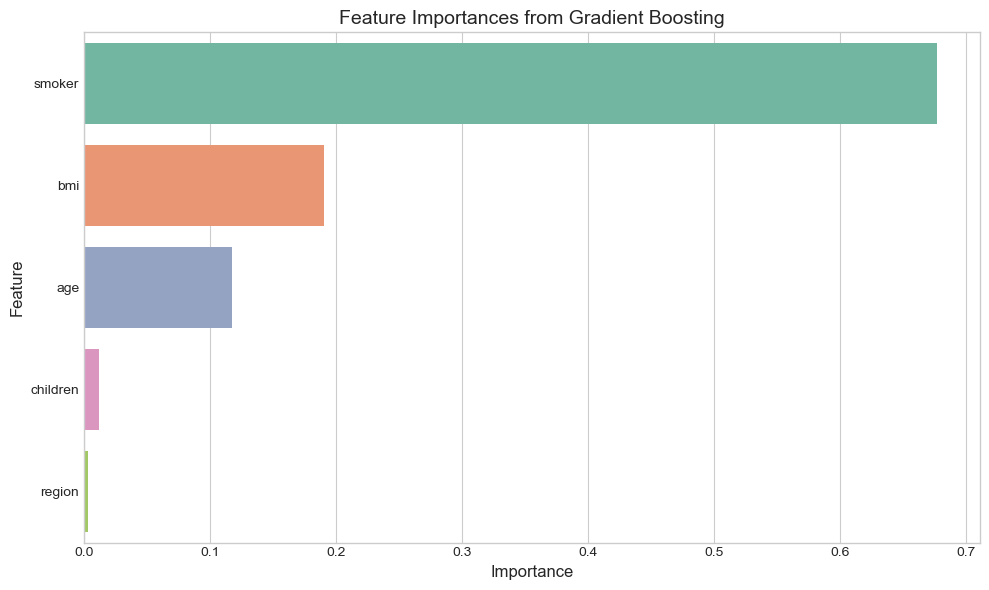

In [128]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title(f'Feature Importances from {best_model_name}', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('best_model_feature_importance.png')
plt.show()

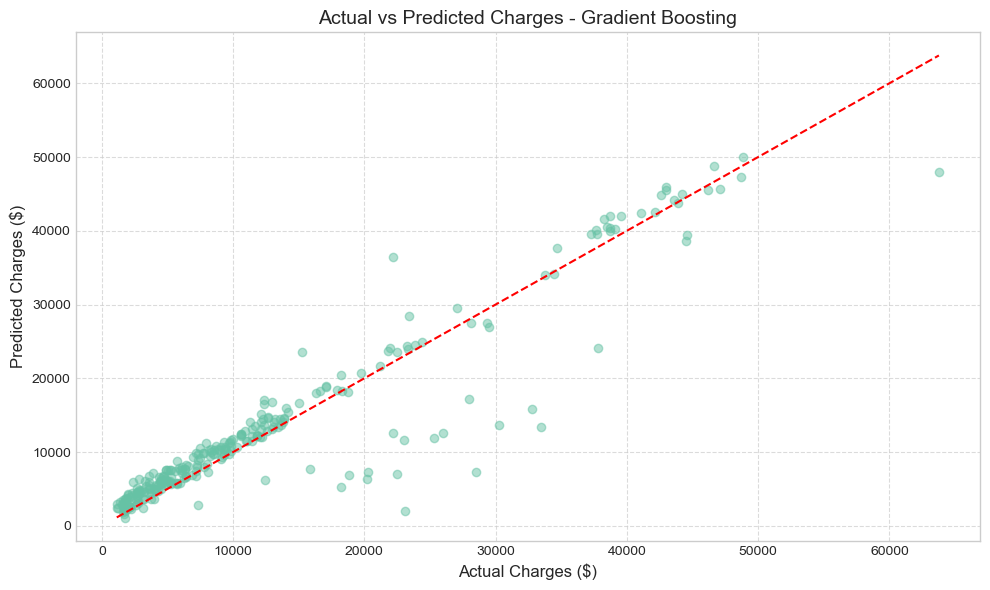

In [129]:
# Plot actual vs predicted values
y_pred = best_model.predict(X_test_reg)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual Charges ($)', fontsize=12)
plt.ylabel('Predicted Charges ($)', fontsize=12)
plt.title(f'Actual vs Predicted Charges - {best_model_name}', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

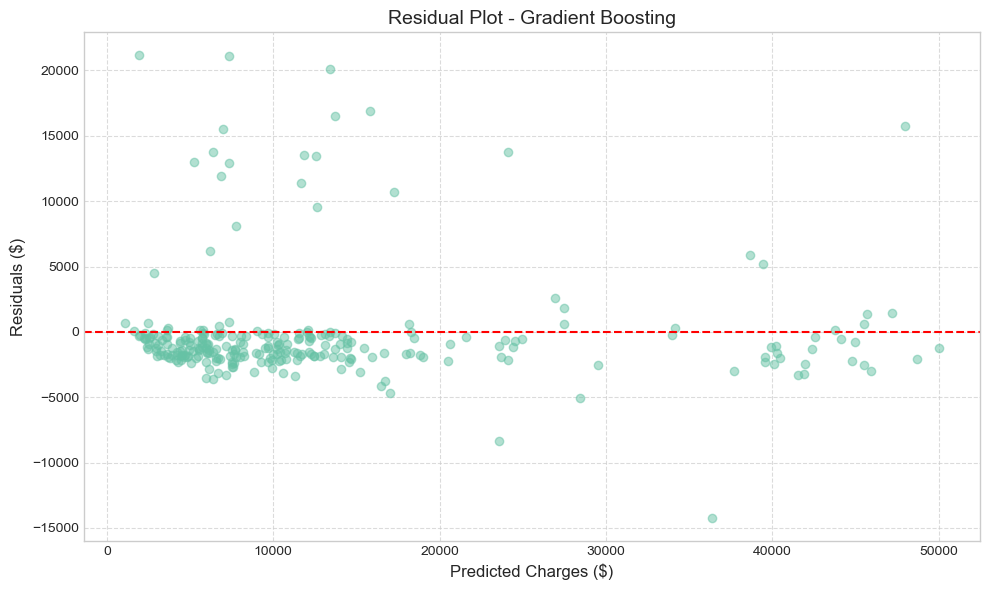

In [130]:
# Plot residuals
residuals = y_test_reg - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Charges ($)', fontsize=12)
plt.ylabel('Residuals ($)', fontsize=12)
plt.title(f'Residual Plot - {best_model_name}', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('residuals_plot.png')
plt.show()

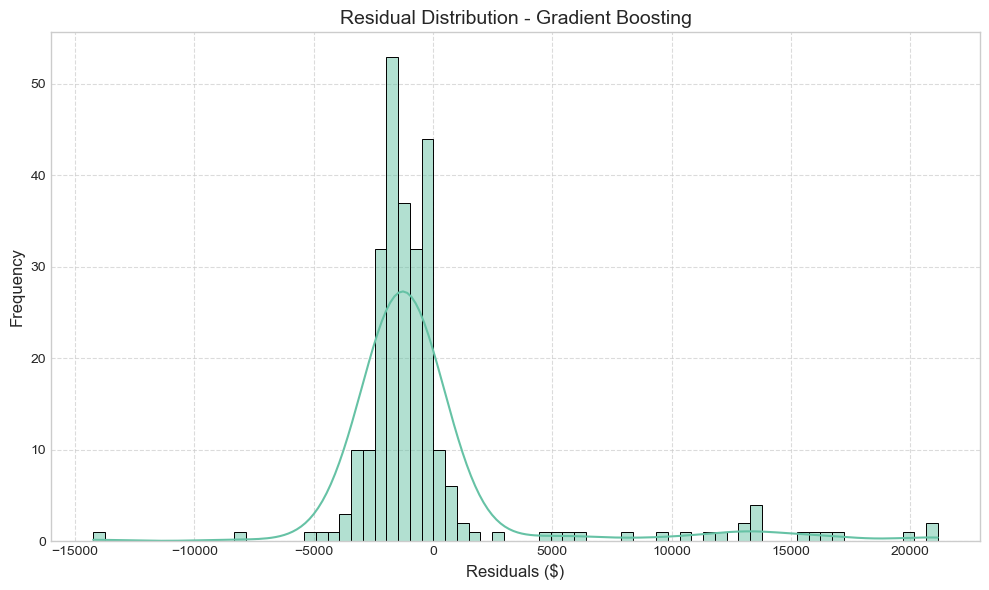

In [131]:
# Residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Residual Distribution - {best_model_name}', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('residuals_distribution.png')
plt.show()

In [132]:
def calculate_prediction_accuracy(y_true, y_pred, thresholds=[0.05, 0.10, 0.15, 0.20]):
    """
    Calculate what percentage of predictions fall within different error thresholds.
    
    Parameters:
    -----------
    y_true : array-like
        Actual target values
    y_pred : array-like
        Predicted target values
    thresholds : list, default=[0.05, 0.10, 0.15, 0.20]
        List of error thresholds to check (as decimal percentages)
    
    Returns:
    --------
    dict
        Dictionary with threshold percentages and corresponding accuracy values
    """
    
    # Calculate percentage errors
    percent_errors = np.abs((y_true - y_pred) / y_true)
    
    # Calculate accuracy for each threshold
    accuracy_results = {}
    for threshold in thresholds:
        within_threshold = np.mean(percent_errors <= threshold) * 100
        accuracy_results[f"Within {threshold*100:.0f}%"] = within_threshold
    
    # Create a DataFrame for easier display
    results_df = pd.DataFrame({
        'Error Threshold': [f"Within {threshold*100:.0f}%" for threshold in thresholds],
        'Accuracy (%)': [accuracy_results[f"Within {threshold*100:.0f}%"] for threshold in thresholds]
    })
    
    # Plot the accuracy results
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Error Threshold', y='Accuracy (%)', data=results_df, palette='viridis')
    
    # Add value labels on bars
    for i, v in enumerate(results_df['Accuracy (%)']):
        ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)
    
    plt.title('Prediction Accuracy at Different Error Thresholds', fontsize=14)
    plt.xlabel('Error Threshold', fontsize=12)
    plt.ylabel('Percentage of Predictions', fontsize=12)
    plt.ylim(0, 105)  # Set y-axis limits
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('prediction_accuracy.png')
    plt.show()
    
    return accuracy_results, results_df



----- Prediction Accuracy Analysis -----


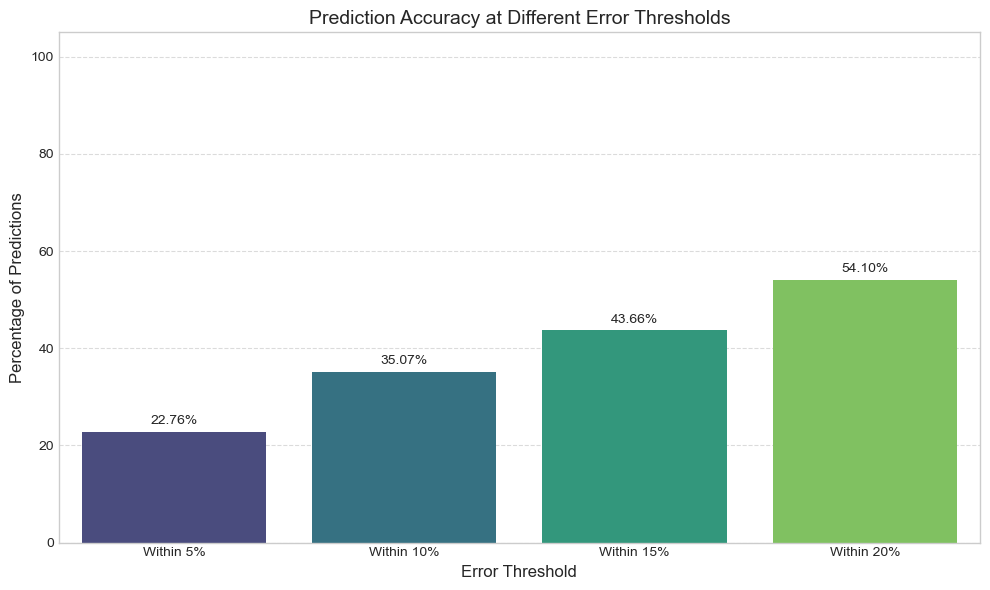


Prediction Accuracy Results:
  Error Threshold  Accuracy (%)
0       Within 5%       22.7612
1      Within 10%       35.0746
2      Within 15%       43.6567
3      Within 20%       54.1045


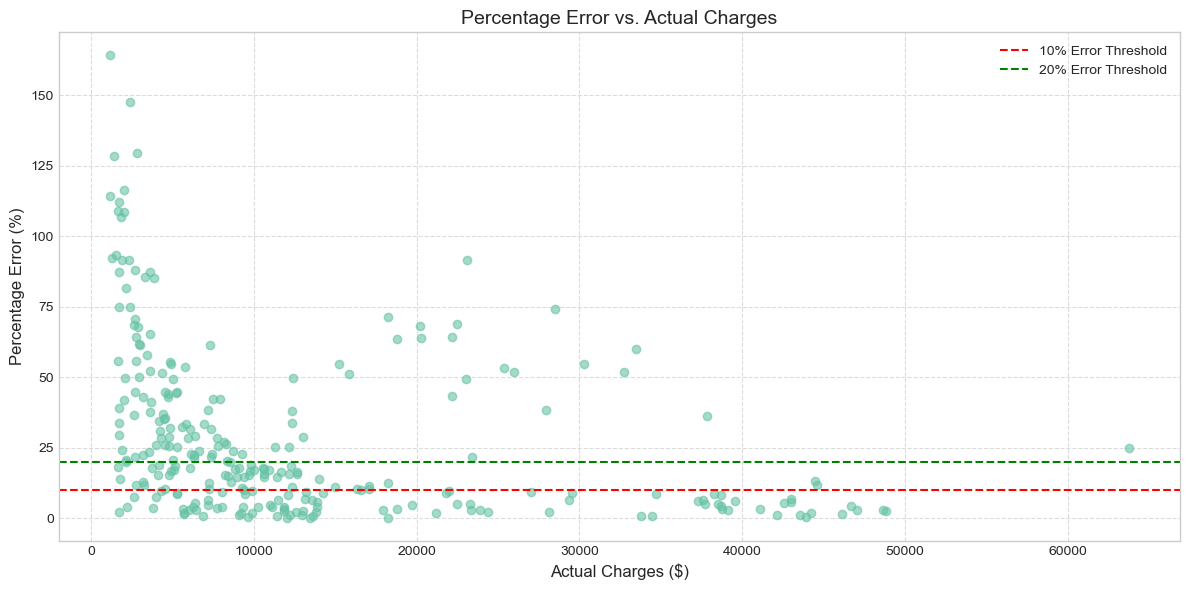


Mean Absolute Percentage Error (MAPE): 28.42%
This means that, on average, the model's predictions are off by 28.42% from the actual values.


In [133]:
# Add this to model evaluation section
# after best model (Gradient Boosting)

print("\n----- Prediction Accuracy Analysis -----")
# Get predictions on the test set using  best model (Gradient Boosting)
y_pred = best_model.predict(X_test_reg)

# Calculate accuracy metrics
accuracy_results, results_df = calculate_prediction_accuracy(y_test_reg, y_pred)
print("\nPrediction Accuracy Results:")
print(results_df)

# Additional analysis: Error distribution by charge amount
plt.figure(figsize=(12, 6))
error_data = pd.DataFrame({
    'Actual Charges': y_test_reg,
    'Percentage Error': np.abs((y_test_reg - y_pred) / y_test_reg) * 100
})

plt.scatter(error_data['Actual Charges'], error_data['Percentage Error'], alpha=0.6)
plt.axhline(y=10, color='r', linestyle='--', label='10% Error Threshold')
plt.axhline(y=20, color='g', linestyle='--', label='20% Error Threshold')
plt.xlabel('Actual Charges ($)', fontsize=12)
plt.ylabel('Percentage Error (%)', fontsize=12)
plt.title('Percentage Error vs. Actual Charges', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('error_distribution.png')
plt.show()

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_reg - y_pred) / y_test_reg)) * 100
print(f"\nMean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"This means that, on average, the model's predictions are off by {mape:.2f}% from the actual values.")

In [134]:
# Apply log transformation to the charges
df['log_charges'] = np.log1p(df['charges'])

# Separate features and both versions of target variable
X = df.drop(['charges', 'log_charges'], axis=1)  # Features
y = df['charges']  # Original target
y_log = df['log_charges']  # Log-transformed target

# Split the data including both targets
X_train, X_test, y_train, y_test, y_log_train, y_log_test = train_test_split(
    X, y, y_log, test_size=0.2, random_state=42
)

# Train Gradient Boosting on log-transformed target 
gb_model.fit(X_train, y_log_train)

# Make predictions in log space, then convert back to dollars
y_pred_log = gb_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Calculate MAPE on original scale
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [135]:
# Print results for clarity
print("\n----- Model Evaluation Results -----")
print(f"MAPE without log transformation (original): 28.4%")
print(f"MAPE with log transformation: {test_mape:.2f}%")
print(f"Improvement: {28.4 - test_mape:.2f} percentage points")
print(f"Relative improvement: {((28.4 - test_mape) / 28.4) * 100:.2f}%")

# Also calculate and print other metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)
print(f"\nRMSE: ${test_rmse:.2f}")
print(f"R²: {test_r2:.4f}")


----- Model Evaluation Results -----
MAPE without log transformation (original): 28.4%
MAPE with log transformation: 6.90%
Improvement: 21.50 percentage points
Relative improvement: 75.69%

RMSE: $2170.02
R²: 0.9697


In [136]:
# Save the improved model with log transformation
import joblib
import os
from datetime import datetime

# Create a directory for models if it doesn't exist
model_dir = 'saved_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Generate a timestamp for the filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"{model_dir}/gb_insurance_model_{timestamp}.pkl"

# Create a dictionary with all necessary components for prediction
model_package = {
    'model': gb_model,
    'feature_columns': X.columns.tolist(),
    'log_transform': True,  # Flag to indicate log transformation was used
    'metadata': {
        'train_date': timestamp,
        'mape': test_mape,
        'rmse': test_rmse,
        'r2': test_r2,
        'description': 'Gradient Boosting model for insurance charges prediction with log transformation'
    }
}

# Save the model package
joblib.dump(model_package, model_filename)
print(f"Model saved to: {model_filename}")

# Create a function to load and use the model for predictions
def load_and_predict(model_path, new_data):
    """
    Load the saved model and make predictions on new data.
    
    Parameters:
    -----------
    model_path : str
        Path to the saved model package
    new_data : pandas.DataFrame
        New data to make predictions on (should have the same columns as training data)
        
    Returns:
    --------
    numpy.ndarray
        Predicted insurance charges
    """
    # Load the model package
    model_package = joblib.load(model_path)
    
    # Extract components
    model = model_package['model']
    feature_columns = model_package['feature_columns']
    log_transform = model_package.get('log_transform', False)
    
    # Ensure new_data has the required columns
    missing_cols = set(feature_columns) - set(new_data.columns)
    if missing_cols:
        raise ValueError(f"Missing columns in new data: {missing_cols}")
    
    # Select and order features to match the training data
    X_new = new_data[feature_columns]
    
    # Make predictions
    if log_transform:
        # If we used log transformation, we need to transform predictions back
        y_pred_log = model.predict(X_new)
        return np.expm1(y_pred_log)
    else:
        return model.predict(X_new)

# Example usage:
"""
# To load and use the model later:
import joblib
import pandas as pd

# Load the model
model_path = "saved_models/gb_insurance_model_20250227_120000.pkl"  # Update with actual path
model_package = joblib.load(model_path)

# Create sample data for prediction (must have same columns as training data)
new_data = pd.DataFrame({
    'age': [35],
    'sex': [1],  # Encoded value (check your encoding mapping)
    'bmi': [28.5],
    'children': [2],
    'smoker': [0],  # Encoded value
    'region': [2]   # Encoded value
    # Include any other columns that were in your training data
})

# Make prediction
predicted_charges = load_and_predict(model_path, new_data)
print(f"Predicted insurance charges: ${predicted_charges[0]:.2f}")
"""



Model saved to: saved_models/gb_insurance_model_20250227_172424.pkl


'\n# To load and use the model later:\nimport joblib\nimport pandas as pd\n\n# Load the model\nmodel_path = "saved_models/gb_insurance_model_20250227_120000.pkl"  # Update with actual path\nmodel_package = joblib.load(model_path)\n\n# Create sample data for prediction (must have same columns as training data)\nnew_data = pd.DataFrame({\n    \'age\': [35],\n    \'sex\': [1],  # Encoded value (check your encoding mapping)\n    \'bmi\': [28.5],\n    \'children\': [2],\n    \'smoker\': [0],  # Encoded value\n    \'region\': [2]   # Encoded value\n    # Include any other columns that were in your training data\n})\n\n# Make prediction\npredicted_charges = load_and_predict(model_path, new_data)\nprint(f"Predicted insurance charges: ${predicted_charges[0]:.2f}")\n'

In [137]:
# Optional: Save the preprocessing steps (e.g., StandardScaler, category mappings)
# This is important if need to preprocess new data the same way as training data
preprocessing_package = {
    'category_mappings': category_mappings,  # From your original code
    'column_order': feature_columns,
    'log_transform': True
}

preprocessing_filename = f"{model_dir}/preprocessing_steps_{timestamp}.pkl"
joblib.dump(preprocessing_package, preprocessing_filename)
print(f"Preprocessing steps saved to: {preprocessing_filename}")

# Create a complete prediction pipeline function
def predict_insurance_charges(model_path, preprocessing_path, person_data):
    """
    End-to-end prediction function that handles preprocessing and prediction.
    
    Parameters:
    -----------
    model_path : str
        Path to the saved model
    preprocessing_path : str
        Path to the saved preprocessing steps
    person_data : dict
        Dictionary with person information (can use raw values like 'male' for sex)
        
    Returns:
    --------
    float
        Predicted insurance charges
    """
    # Load preprocessing steps
    preproc = joblib.load(preprocessing_path)
    category_mappings = preproc['category_mappings']
    
    # Process the input data
    processed_data = {}
    
    # Apply category mappings for categorical variables
    for col, mapping in category_mappings.items():
        if col in person_data:
            # If the value is already encoded, use it directly
            if isinstance(person_data[col], (int, float)):
                processed_data[col] = person_data[col]
            # Otherwise, look up the encoding
            elif person_data[col] in mapping:
                processed_data[col] = mapping[person_data[col]]
            else:
                raise ValueError(f"Unknown value for {col}: {person_data[col]}")
    
    # Copy numeric columns as is
    for col in person_data:
        if col not in category_mappings and col not in processed_data:
            processed_data[col] = person_data[col]
    
    # Create DataFrame with processed data
    df_new = pd.DataFrame([processed_data])
    
    # Make prediction using the previously defined function
    prediction = load_and_predict(model_path, df_new)
    return prediction[0]

# Example of using the full prediction pipeline:
"""
# Example usage with raw values
person = {
    'age': 42,
    'sex': 'male',  # Raw value
    'bmi': 31.2,
    'children': 2,
    'smoker': 'yes',  # Raw value
    'region': 'southwest'  # Raw value
}

model_path = "saved_models/gb_insurance_model_20250227_120000.pkl"  # Update with actual path
preprocessing_path = "saved_models/preprocessing_steps_20250227_120000.pkl"  # Update with actual path

predicted_charge = predict_insurance_charges(model_path, preprocessing_path, person)
print(f"Predicted insurance charge for this person: ${predicted_charge:.2f}")
"""

Preprocessing steps saved to: saved_models/preprocessing_steps_20250227_172424.pkl


'\n# Example usage with raw values\nperson = {\n    \'age\': 42,\n    \'sex\': \'male\',  # Raw value\n    \'bmi\': 31.2,\n    \'children\': 2,\n    \'smoker\': \'yes\',  # Raw value\n    \'region\': \'southwest\'  # Raw value\n}\n\nmodel_path = "saved_models/gb_insurance_model_20250227_120000.pkl"  # Update with actual path\npreprocessing_path = "saved_models/preprocessing_steps_20250227_120000.pkl"  # Update with actual path\n\npredicted_charge = predict_insurance_charges(model_path, preprocessing_path, person)\nprint(f"Predicted insurance charge for this person: ${predicted_charge:.2f}")\n'

In [139]:
# Get predictions on the test set (assuming we're using our best model with log transformation)
y_pred_log = gb_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Convert back from log scale

# Calculate various accuracy metrics
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate percentage accuracy (100% - MAPE)
accuracy_percentage = 100 - mape

# Calculate additional accuracy metrics at different thresholds
def accuracy_within_threshold(y_true, y_pred, threshold_pct):
    """Calculate percentage of predictions within a certain error threshold"""
    percent_errors = np.abs((y_true - y_pred) / y_true) * 100
    return np.mean(percent_errors <= threshold_pct) * 100

# Calculate accuracy at different thresholds
accuracy_5pct = accuracy_within_threshold(y_test, y_pred, 5)
accuracy_10pct = accuracy_within_threshold(y_test, y_pred, 10)
accuracy_15pct = accuracy_within_threshold(y_test, y_pred, 15)
accuracy_20pct = accuracy_within_threshold(y_test, y_pred, 20)



In [140]:
# Print a comprehensive summary of model accuracy
print("\n" + "="*50)
print("               MODEL ACCURACY SUMMARY")
print("="*50)
print(f"Overall Accuracy Percentage: {accuracy_percentage:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Square Error (RMSE): ${rmse:.2f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print("\nPrediction Accuracy at Various Thresholds:")
print(f"Within 5% of actual value: {accuracy_5pct:.2f}%")
print(f"Within 10% of actual value: {accuracy_10pct:.2f}%")
print(f"Within 15% of actual value: {accuracy_15pct:.2f}%")
print(f"Within 20% of actual value: {accuracy_20pct:.2f}%")
print("="*50)


               MODEL ACCURACY SUMMARY
Overall Accuracy Percentage: 93.10%
Mean Absolute Percentage Error (MAPE): 6.90%
R-squared (R²): 0.9697
Root Mean Square Error (RMSE): $2170.02
Mean Absolute Error (MAE): $1016.12

Prediction Accuracy at Various Thresholds:
Within 5% of actual value: 53.36%
Within 10% of actual value: 81.72%
Within 15% of actual value: 89.93%
Within 20% of actual value: 93.28%
